Epoch [100/1000], Loss: 0.1614
Epoch [200/1000], Loss: 0.1587
Epoch [300/1000], Loss: 0.1558
Epoch [400/1000], Loss: 0.1323
Epoch [500/1000], Loss: 0.0910
Epoch [600/1000], Loss: 0.0583
Epoch [700/1000], Loss: 0.0391
Epoch [800/1000], Loss: 0.0287
Epoch [900/1000], Loss: 0.0230
Epoch [1000/1000], Loss: 0.0196


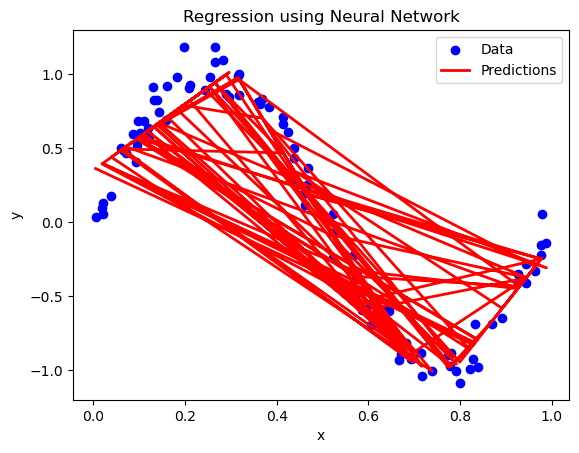

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# データの生成
# 1次元のデータを生成します (x: 0から1のランダム値, y: sin(2 * pi * x) + ノイズ)
np.random.seed(0)  # 再現性のために乱数シードを固定
x = np.random.rand(100, 1)  # 100個のサンプルを生成
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(100, 1)  # ノイズを加えた出力

# numpy配列をPyTorchのテンソルに変換
X_train = torch.FloatTensor(x)
y_train = torch.FloatTensor(y)

# ニューラルネットワークモデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 10)  # 隠れ層 (入力次元: 1, 出力次元: 10)
        self.relu = nn.ReLU()            # 活性化関数
        self.output = nn.Linear(10, 1)   # 出力層 (入力次元: 10, 出力次元: 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# モデル、損失関数、最適化手法の初期化
model = SimpleNN()
criterion = nn.MSELoss()  # 平均二乗誤差損失関数
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adamオプティマイザ

# 学習ループ
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  # モデルを訓練モードにセット
    optimizer.zero_grad()  # 勾配を初期化

    # フォワードパス
    predictions = model(X_train)

    # 損失計算
    loss = criterion(predictions, y_train)

    # バックプロパゲーション
    loss.backward()
    optimizer.step()

    # 進捗の表示
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# モデルの評価
model.eval()  # モデルを評価モードにセット
with torch.no_grad():
    y_pred = model(X_train).numpy()

# 結果のプロット
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Predictions', linewidth=2)
plt.title('Regression using Neural Network')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


上のコードは図示部分がおかしいので以下で修正した。


修正後

Epoch [100/1000], Loss: 0.1799
Epoch [200/1000], Loss: 0.1746
Epoch [300/1000], Loss: 0.1710
Epoch [400/1000], Loss: 0.1671
Epoch [500/1000], Loss: 0.1617
Epoch [600/1000], Loss: 0.1559
Epoch [700/1000], Loss: 0.1530
Epoch [800/1000], Loss: 0.1520
Epoch [900/1000], Loss: 0.1517
Epoch [1000/1000], Loss: 0.1517


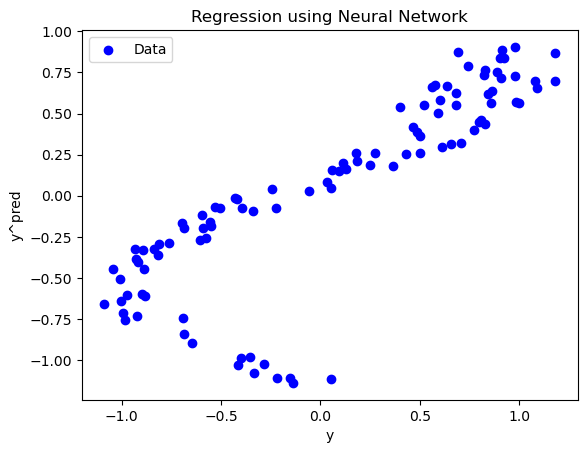

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# データの生成
# 1次元のデータを生成します (x: 0から1のランダム値, y: sin(2 * pi * x) + ノイズ)
np.random.seed(0)  # 再現性のために乱数シードを固定
x = np.random.rand(100, 1)  # 100個のサンプルを生成
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(100, 1)  # ノイズを加えた出力

# numpy配列をPyTorchのテンソルに変換
X_train = torch.FloatTensor(x)
y_train = torch.FloatTensor(y)

# ニューラルネットワークモデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 10)  # 隠れ層 (入力次元: 1, 出力次元: 10)
        self.relu = nn.ReLU()            # 活性化関数
        self.output = nn.Linear(10, 1)   # 出力層 (入力次元: 10, 出力次元: 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# モデル、損失関数、最適化手法の初期化
model = SimpleNN()
criterion = nn.MSELoss()  # 平均二乗誤差損失関数
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adamオプティマイザ

# 学習ループ
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  # モデルを訓練モードにセット
    optimizer.zero_grad()  # 勾配を初期化

    # フォワードパス
    predictions = model(X_train)

    # 損失計算
    loss = criterion(predictions, y_train)

    # バックプロパゲーション
    loss.backward()
    optimizer.step()

    # 進捗の表示
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# モデルの評価
model.eval()  # モデルを評価モードにセット
with torch.no_grad():
    y_pred = model(X_train).numpy()

# 結果のプロット
plt.scatter(y,y_pred, color='blue', label='Data')
plt.title('Regression using Neural Network')
plt.xlabel('y')
plt.ylabel('y^pred')
plt.legend()
plt.show()

ドロップアウト、バッチ正則化を有効に

Epoch [100/3000], Loss: 0.1406
Epoch [200/3000], Loss: 0.1322
Epoch [300/3000], Loss: 0.1308
Epoch [400/3000], Loss: 0.1316
Epoch [500/3000], Loss: 0.1170
Epoch [600/3000], Loss: 0.1185
Epoch [700/3000], Loss: 0.1227
Epoch [800/3000], Loss: 0.1434
Epoch [900/3000], Loss: 0.1594
Epoch [1000/3000], Loss: 0.1198
Epoch [1100/3000], Loss: 0.1188
Epoch [1200/3000], Loss: 0.1165
Epoch [1300/3000], Loss: 0.1264
Epoch [1400/3000], Loss: 0.1339
Epoch [1500/3000], Loss: 0.1049
Epoch [1600/3000], Loss: 0.1438
Epoch [1700/3000], Loss: 0.1221
Epoch [1800/3000], Loss: 0.1362
Epoch [1900/3000], Loss: 0.1348
Epoch [2000/3000], Loss: 0.1447
Epoch [2100/3000], Loss: 0.1161
Epoch [2200/3000], Loss: 0.1247
Epoch [2300/3000], Loss: 0.1147
Epoch [2400/3000], Loss: 0.1503
Epoch [2500/3000], Loss: 0.1481
Epoch [2600/3000], Loss: 0.1077
Epoch [2700/3000], Loss: 0.1496
Epoch [2800/3000], Loss: 0.1393
Epoch [2900/3000], Loss: 0.1378
Epoch [3000/3000], Loss: 0.1432


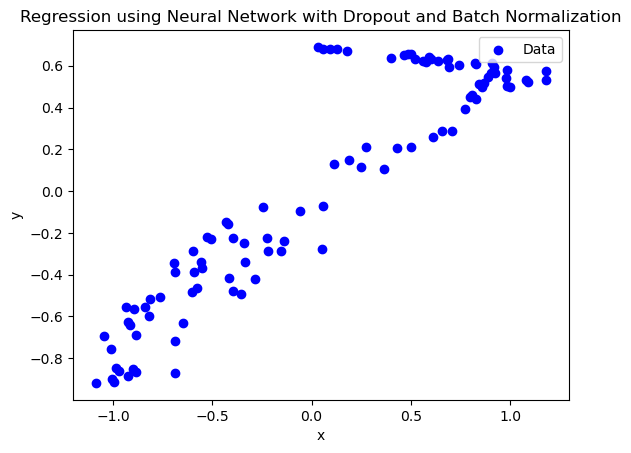

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# データの生成
np.random.seed(0)  # 再現性のために乱数シードを固定
x = np.random.rand(100, 1)  # 100個のサンプルを生成
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(100, 1)  # ノイズを加えた出力

# numpy配列をPyTorchのテンソルに変換
X_train = torch.FloatTensor(x)
y_train = torch.FloatTensor(y)

# ニューラルネットワークモデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 10)  # 隠れ層
        self.batch_norm = nn.BatchNorm1d(10)  # バッチ正則化
        self.relu = nn.ReLU()            # 活性化関数
        self.dropout = nn.Dropout(0.2)   # ドロップアウト (50%の確率でニューロンを無効化)
        self.output = nn.Linear(10, 1)   # 出力層

    def forward(self, x):
        x = self.hidden(x)               # 隠れ層へのパス
        x = self.batch_norm(x)           # バッチ正則化
        x = self.relu(x)                 # 活性化関数の適用
        x = self.dropout(x)               # ドロップアウトの適用
        x = self.output(x)               # 出力層へのパス
        return x

# モデル、損失関数、最適化手法の初期化
model = SimpleNN()
criterion = nn.MSELoss()              # 平均二乗誤差損失関数
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adamオプティマイザ

# 学習ループ
num_epochs = 3000
for epoch in range(num_epochs):
    model.train()  # モデルを訓練モードにセット
    optimizer.zero_grad()  # 勾配を初期化

    # フォワードパス
    predictions = model(X_train)

    # 損失計算
    loss = criterion(predictions, y_train)

    # バックプロパゲーション
    loss.backward()
    optimizer.step()

    # 進捗の表示
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# モデルの評価
model.eval()  # モデルを評価モードにセット
with torch.no_grad():
    y_pred = model(X_train).numpy()

# 結果のプロット
plt.scatter(y, y_pred, color='blue', label='Data')
plt.title('Regression using Neural Network with Dropout and Batch Normalization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```
# 依頼
コードを修正してください。
# 詳細
ドロップアウトとバッチ正則化を無効します。
全データを訓練データとテストデータに分けます。
epoch毎に損失関数の値を図示してください。
テストデータで回帰モデルの評価指標MAE，R２，RMSEを出力してください。
y vs y_predの図を書いてください。
```

Epoch [100/1000], Loss: 0.1802
Epoch [200/1000], Loss: 0.1783
Epoch [300/1000], Loss: 0.1714
Epoch [400/1000], Loss: 0.1643
Epoch [500/1000], Loss: 0.1618
Epoch [600/1000], Loss: 0.1615
Epoch [700/1000], Loss: 0.1615
Epoch [800/1000], Loss: 0.1615
Epoch [900/1000], Loss: 0.1615
Epoch [1000/1000], Loss: 0.1615


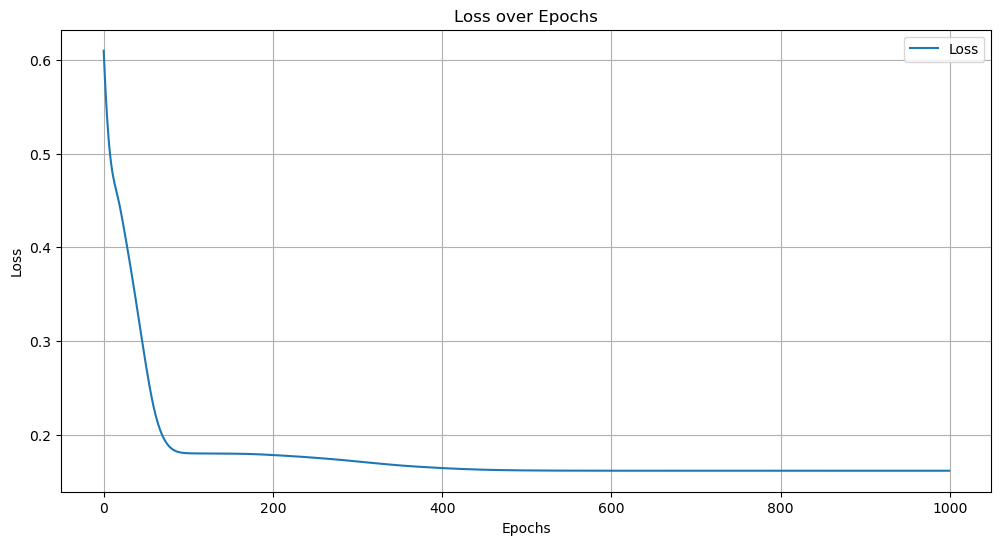

Mean Absolute Error (MAE): 0.2457
R² Score: 0.7350
Root Mean Squared Error (RMSE): 0.1137


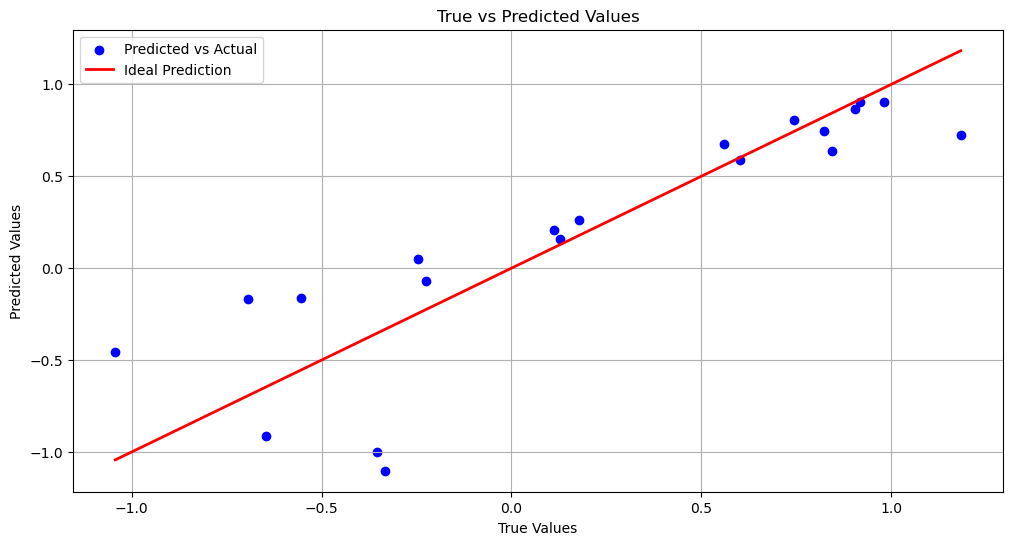

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# データの生成
np.random.seed(0)  # 再現性のために乱数シードを固定
x = np.random.rand(100, 1)  # 100個のサンプルを生成
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(100, 1)  # ノイズを加えた出力

# numpy配列をPyTorchのテンソルに変換
X = torch.FloatTensor(x)
y = torch.FloatTensor(y)

# データの分割 (80%を訓練データ、20%をテストデータ)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ニューラルネットワークモデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 10)  # 隠れ層
        self.relu = nn.ReLU()            # 活性化関数
        self.output = nn.Linear(10, 1)   # 出力層

    def forward(self, x):
        x = self.hidden(x)               # 隠れ層へのパス
        x = self.relu(x)                 # 活性化関数の適用
        x = self.output(x)               # 出力層へのパス
        return x

# モデル、損失関数、最適化手法の初期化
model = SimpleNN()
criterion = nn.MSELoss()              # 平均二乗誤差損失関数
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adamオプティマイザ

# 学習ループ
num_epochs = 1000
losses = []  # 損失を保持するリスト

for epoch in range(num_epochs):
    model.train()  # モデルを訓練モードにセット
    optimizer.zero_grad()  # 勾配を初期化

    # フォワードパス
    predictions = model(X_train)

    # 損失計算
    loss = criterion(predictions, y_train)
    losses.append(loss.item())  # 損失をリストに追加

    # バックプロパゲーション
    loss.backward()
    optimizer.step()

    # 進捗の表示
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# モデルの評価
model.eval()  # モデルを評価モードにセット
with torch.no_grad():
    y_pred = model(X_test).numpy()  # テストデータに対する予測

# エポックごとに損失の値を図示
plt.figure(figsize=(12, 6))
plt.plot(range(num_epochs), losses, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 評価指標の計算
mae = mean_absolute_error(y_test.numpy(), y_pred)
r2 = r2_score(y_test.numpy(), y_pred)
# rmse = mean_squared_error(y_test.numpy(), y_pred, squared=False) # squared=Falseがあると原因不明なエラーが起きる。
rmse = mean_squared_error(y_test.numpy(), y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# y vs y_predの図を作成
plt.figure(figsize=(12, 6))
plt.scatter(y_test.numpy(), y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test.numpy()), max(y_test.numpy())], 
         [min(y_test.numpy()), max(y_test.numpy())], 
         color='red', label='Ideal Prediction', linewidth=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()



```
# 依頼
コードを修正してください。
# 詳細
説明変数が５つのデータを用いてください。
ドロップアウトを有効にします。
全データを訓練データとテストデータに分けます。
epoch毎に損失関数の値を図示してください。
テストデータで回帰モデルの評価指標MAE，R２，RMSEを出力してください。
y vs y_predの図を書いてください。
```

Epoch [100/1000], Loss: 0.2377
Epoch [200/1000], Loss: 0.3179
Epoch [300/1000], Loss: 0.2766
Epoch [400/1000], Loss: 0.2744
Epoch [500/1000], Loss: 0.2440
Epoch [600/1000], Loss: 0.2310
Epoch [700/1000], Loss: 0.2834
Epoch [800/1000], Loss: 0.2449
Epoch [900/1000], Loss: 0.3733
Epoch [1000/1000], Loss: 0.2815


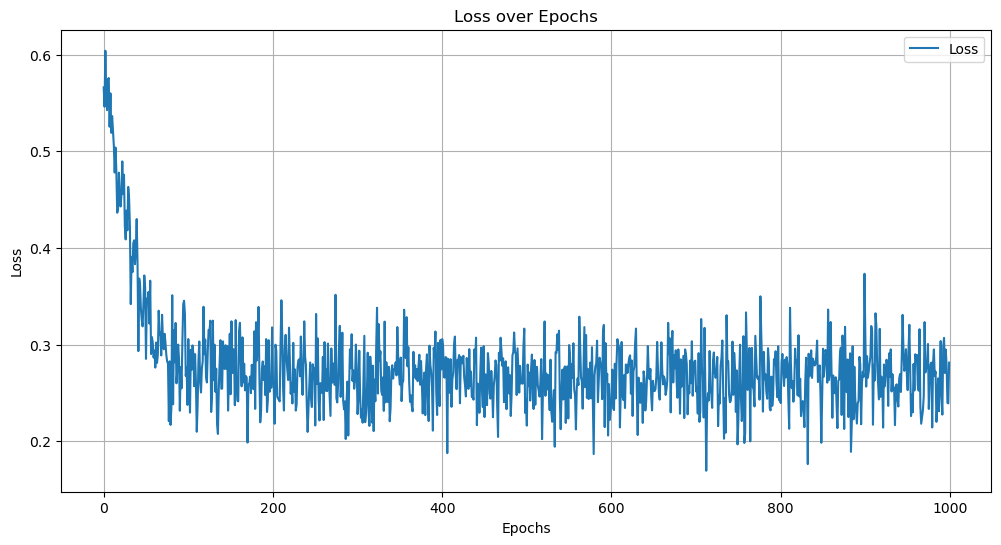

Mean Absolute Error (MAE): 0.3842
R² Score: 0.6666
Root Mean Squared Error (RMSE): 0.2020


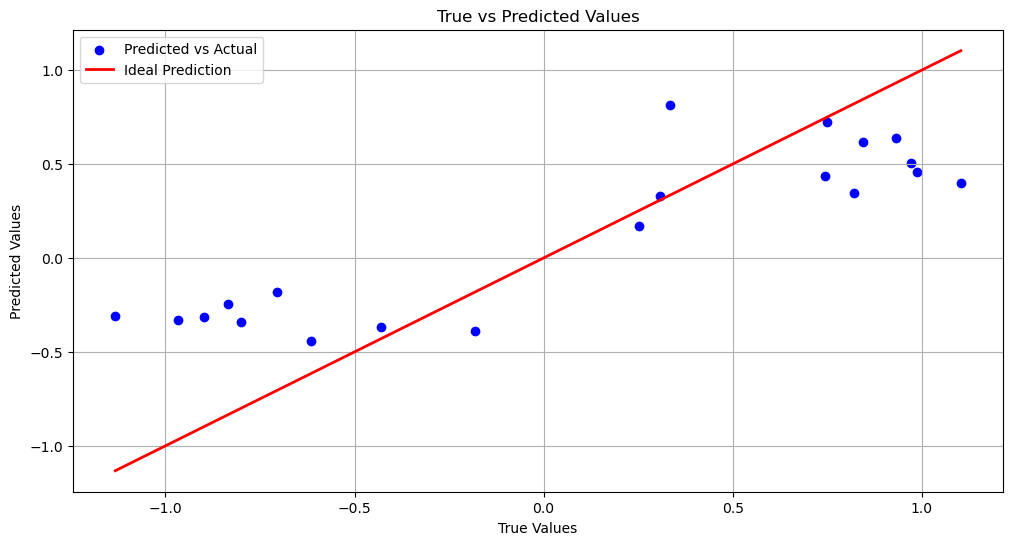

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# データの生成
np.random.seed(0)  # 再現性のために乱数シードを固定
X = np.random.rand(100, 5)  # 100個のサンプル、5つの特徴量
y = np.sin(2 * np.pi * X[:, 0]) + 0.1 * np.random.randn(100)  # ノイズを加えた出力 (1つの特徴量による)

# numpy配列をPyTorchのテンソルに変換
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(-1, 1)

# データの分割 (80%を訓練データ、20%をテストデータ)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=0)

# ニューラルネットワークモデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(5, 10)  # 隠れ層 (5つの特徴量を入力)
        self.relu = nn.ReLU()            # 活性化関数
        self.dropout = nn.Dropout(0.5)   # ドロップアウト (50%の確率でニューロンを無効化)
        self.output = nn.Linear(10, 1)   # 出力層

    def forward(self, x):
        x = self.hidden(x)               # 隠れ層へのパス
        x = self.relu(x)                 # 活性化関数の適用
        x = self.dropout(x)              # ドロップアウトの適用
        x = self.output(x)               # 出力層へのパス
        return x

# モデル、損失関数、最適化手法の初期化
model = SimpleNN()
criterion = nn.MSELoss()              # 平均二乗誤差損失関数
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adamオプティマイザ

# 学習ループ
num_epochs = 1000
losses = []  # 損失を保持するリスト

for epoch in range(num_epochs):
    model.train()  # モデルを訓練モードにセット
    optimizer.zero_grad()  # 勾配を初期化

    # フォワードパス
    predictions = model(X_train)

    # 損失計算
    loss = criterion(predictions, y_train)
    losses.append(loss.item())  # 損失をリストに追加

    # バックプロパゲーション
    loss.backward()
    optimizer.step()

    # 進捗の表示
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# モデルの評価
model.eval()  # モデルを評価モードにセット
with torch.no_grad():
    y_pred = model(X_test).numpy()  # テストデータに対する予測

# エポックごとに損失の値を図示
plt.figure(figsize=(12, 6))
plt.plot(range(num_epochs), losses, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 評価指標の計算
mae = mean_absolute_error(y_test.numpy(), y_pred)
r2 = r2_score(y_test.numpy(), y_pred)
# rmse = mean_squared_error(y_test.numpy(), y_pred, squared=False)
rmse = mean_squared_error(y_test.numpy(), y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# y vs y_predの図を作成
plt.figure(figsize=(12, 6))
plt.scatter(y_test.numpy(), y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test.numpy()), max(y_test.numpy())], 
         [min(y_test.numpy()), max(y_test.numpy())], 
         color='red', label='Ideal Prediction', linewidth=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# GPUを使うように書き直してください。


Epoch [100/1000], Loss: 0.2212
Epoch [200/1000], Loss: 0.2746
Epoch [300/1000], Loss: 0.2527
Epoch [400/1000], Loss: 0.2197
Epoch [500/1000], Loss: 0.2705
Epoch [600/1000], Loss: 0.2300
Epoch [700/1000], Loss: 0.2282
Epoch [800/1000], Loss: 0.2232
Epoch [900/1000], Loss: 0.2224
Epoch [1000/1000], Loss: 0.2324


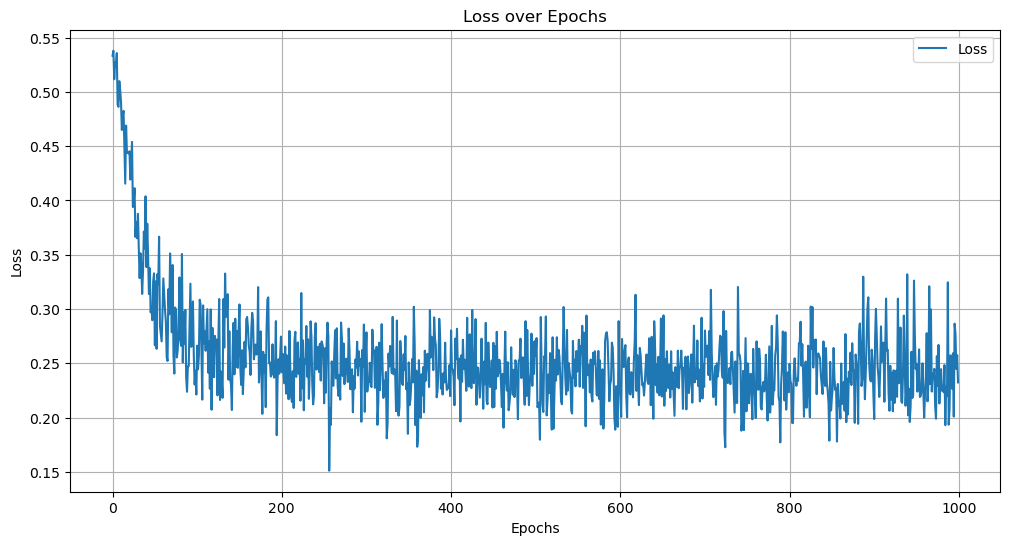

Mean Absolute Error (MAE): 0.3709
R² Score: 0.7015
Root Mean Squared Error (RMSE): 0.1808


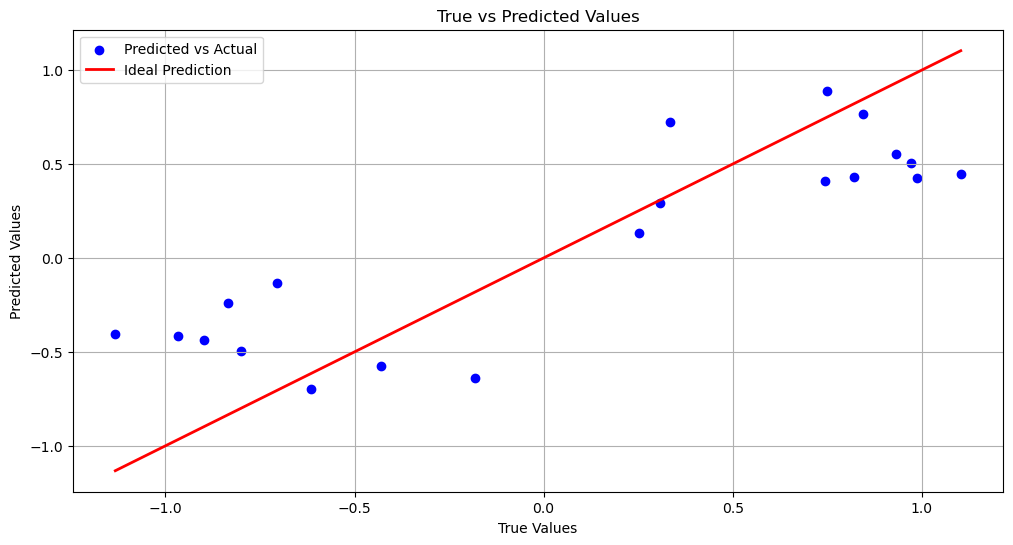

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# データの生成
np.random.seed(0)  # 再現性のために乱数シードを固定
X = np.random.rand(100, 5)  # 100個のサンプル、5つの特徴量
y = np.sin(2 * np.pi * X[:, 0]) + 0.1 * np.random.randn(100)  # ノイズを加えた出力

# numpy配列をPyTorchのテンソルに変換
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(-1, 1)

# データの分割 (80%を訓練データ、20%をテストデータ)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=0)

# GPUの使用を確認
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# データをGPUに転送
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# ニューラルネットワークモデルの定義
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(5, 10)  # 隠れ層 (5つの特徴量を入力)
        self.relu = nn.ReLU()            # 活性化関数
        self.dropout = nn.Dropout(0.5)   # ドロップアウト (50%の確率でニューロンを無効化)
        self.output = nn.Linear(10, 1)   # 出力層

    def forward(self, x):
        x = self.hidden(x)               # 隠れ層へのパス
        x = self.relu(x)                 # 活性化関数の適用
        x = self.dropout(x)              # ドロップアウトの適用
        x = self.output(x)               # 出力層へのパス
        return x

# モデルをGPUに転送
model = SimpleNN().to(device)

# 損失関数と最適化手法の初期化
criterion = nn.MSELoss()              # 平均二乗誤差損失関数
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adamオプティマイザ

# 学習ループ
num_epochs = 1000
losses = []  # 損失を保持するリスト

for epoch in range(num_epochs):
    model.train()  # モデルを訓練モードにセット
    optimizer.zero_grad()  # 勾配を初期化

    # フォワードパス
    predictions = model(X_train)

    # 損失計算
    loss = criterion(predictions, y_train)
    losses.append(loss.item())  # 損失をリストに追加

    # バックプロパゲーション
    loss.backward()
    optimizer.step()

    # 進捗の表示
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# モデルの評価
model.eval()  # モデルを評価モードにセット
with torch.no_grad():
    y_pred = model(X_test).cpu().numpy()  # テストデータに対する予測をCPUへ転送してNumPyに変換

# エポックごとに損失の値を図示
plt.figure(figsize=(12, 6))
plt.plot(range(num_epochs), losses, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 評価指標の計算
mae = mean_absolute_error(y_test.cpu().numpy(), y_pred)
r2 = r2_score(y_test.cpu().numpy(), y_pred)
# rmse = mean_squared_error(y_test.cpu().numpy(), y_pred, squared=False)
rmse = mean_squared_error(y_test.cpu().numpy(), y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# y vs y_predの図を作成
plt.figure(figsize=(12, 6))
plt.scatter(y_test.cpu().numpy(), y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test.cpu().numpy()), max(y_test.cpu().numpy())], 
         [min(y_test.cpu().numpy()), max(y_test.cpu().numpy())], 
         color='red', label='Ideal Prediction', linewidth=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

# 100.regression/で用いたReCoデータを用いる。

- 入力層のサイズをPとする。
- 隠れ層を２層にする。

In [6]:
import get_data
DATA_NAME = "ReCo"
df_obs,descriptor_names, target_name = get_data.load(DATA_NAME, "..")
Xraw = df_obs.loc[:, descriptor_names].values
y = df_obs.loc[:, target_name].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(Xraw)
P = X.shape[1]
print(P)

11


Epoch [100/1000], Loss: 164942.5938
Epoch [200/1000], Loss: 16658.6621
Epoch [300/1000], Loss: 11208.0498
Epoch [400/1000], Loss: 9227.2539
Epoch [500/1000], Loss: 8067.6802
Epoch [600/1000], Loss: 7482.7012
Epoch [700/1000], Loss: 6993.4282
Epoch [800/1000], Loss: 6592.5176
Epoch [900/1000], Loss: 6214.4849
Epoch [1000/1000], Loss: 6000.3696


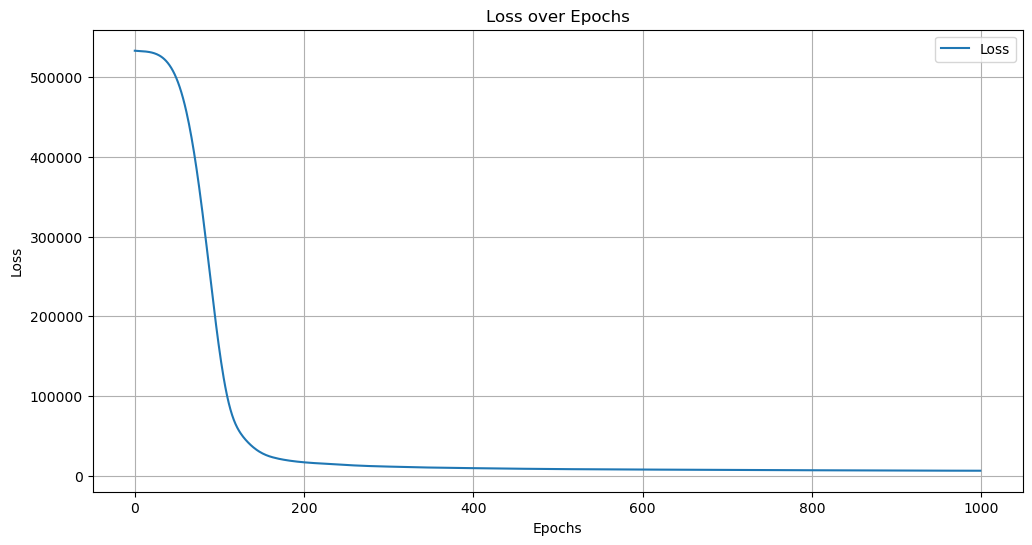

Mean Absolute Error (MAE): 70.2271
R² Score: 0.9535
Root Mean Squared Error (RMSE): 6940.4980


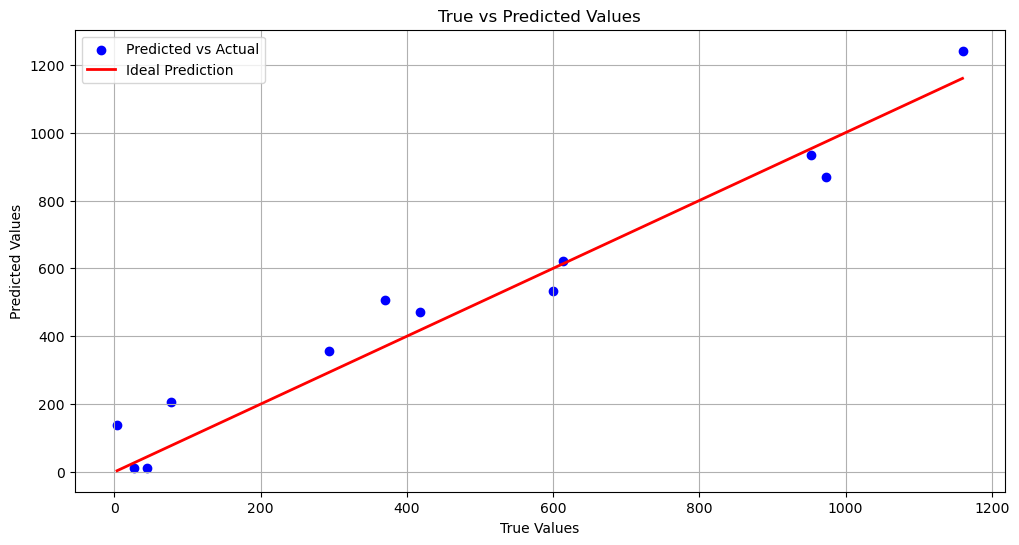

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# データの生成
# np.random.seed(0)  # 再現性のために乱数シードを固定
# X = np.random.rand(100, 5)  # 100個のサンプル、5つの特徴量
# y = np.sin(2 * np.pi * X[:, 0]) + 0.1 * np.random.randn(100)  # ノイズを加えた出力

# numpy配列をPyTorchのテンソルに変換
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(-1, 1)

# データの分割 (80%を訓練データ、20%をテストデータ)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=0)

# GPUの使用を確認
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# データをGPUに転送
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# ---------書き換え部分
# ニューラルネットワークモデルの定義
class SimpleNN(nn.Module):
    def __init__(self, P):
        super(SimpleNN, self).__init__()
        self.hidden1 = nn.Linear(P, 10)  # 隠れ層1
        self.hidden2 = nn.Linear(10, 5)  # 隠れ層2
        self.output = nn.Linear(5, 1)  # 出力層
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        return self.output(x)

# モデルをGPUに転送
model = SimpleNN(P).to(device)
# ---------書き換え部分ここまで

# 損失関数と最適化手法の初期化
criterion = nn.MSELoss()              # 平均二乗誤差損失関数
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adamオプティマイザ

# 学習ループ
num_epochs = 1000
losses = []  # 損失を保持するリスト

for epoch in range(num_epochs):
    model.train()  # モデルを訓練モードにセット
    optimizer.zero_grad()  # 勾配を初期化

    # フォワードパス
    predictions = model(X_train)

    # 損失計算
    loss = criterion(predictions, y_train)
    losses.append(loss.item())  # 損失をリストに追加

    # バックプロパゲーション
    loss.backward()
    optimizer.step()

    # 進捗の表示
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# モデルの評価
model.eval()  # モデルを評価モードにセット
with torch.no_grad():
    y_pred = model(X_test).cpu().numpy()  # テストデータに対する予測をCPUへ転送してNumPyに変換

# エポックごとに損失の値を図示
plt.figure(figsize=(12, 6))
plt.plot(range(num_epochs), losses, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# 評価指標の計算
mae = mean_absolute_error(y_test.cpu().numpy(), y_pred)
r2 = r2_score(y_test.cpu().numpy(), y_pred)
# rmse = mean_squared_error(y_test.cpu().numpy(), y_pred, squared=False)
rmse = mean_squared_error(y_test.cpu().numpy(), y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# y vs y_predの図を作成
plt.figure(figsize=(12, 6))
plt.scatter(y_test.cpu().numpy(), y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test.cpu().numpy()), max(y_test.cpu().numpy())], 
         [min(y_test.cpu().numpy()), max(y_test.cpu().numpy())], 
         color='red', label='Ideal Prediction', linewidth=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()